In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import copy

In [2]:
#decide to change from s to i
def choose(q,i, numS, samples):
    p = 1-q**i
    weighted = random.choices(samples, weights = (1-p, p), k=numS)
    return weighted

Network to simulate reedfrost:

In [3]:
def infect(G, q):
    choices = ['s','i']
    I = []
    R = []
    infected = list(dict( (n,d['val']) for n,d in G.nodes().items() if d['val'] == 'i'))
    for i in range(len(G.nodes)):
        if G.nodes[i]['val'] == 's':
            neighbors = list(G.adj[i]) # find all nodes connected to node i with ['val'] == 'i'
            infectedNeighbors = list(set(neighbors).intersection(set(infected)))
            p = 1-q**len(infectedNeighbors)
            choose = random.choices(choices, weights=(1-p, p), k=1)
            if choose[0] == 'i':
                I.append(i)
        elif G.nodes[i]['val'] == 'i':
            R.append(i)
    return [I, R]

def start(G, n):
    for i in range(n):
        length = len(G.nodes())
        num = random.randrange(length)
        G.nodes[num]['val'] = 'i'

def networkModel():
    #build network and set all to susceptible
    s = 2000
    G = nx.complete_graph(s)

    for i in G:
        G.nodes[i]['val'] = 's'
    numGen = 20
    q = .999
    i = 2

    hist = []
    I = [i]
    start(G,i)
    hist.append(G)

    #infect netwok
    for i in range(numGen):
        output = infect(G,q)
        I.append(len(output[0]))

        for j in output[0]:
            G.nodes[j]['val'] = 'i'
        for r in output[1]:
            G.nodes[r]['val'] = 'r'

    plt.plot(I)

numRep = 5
for i in range(numRep):
    networkModel()

plt.grid()
plt.show()

KeyboardInterrupt: 

Network with broken ties:

In [4]:
# removes p percent of edges
def removeRandom(G, p):
    num = int(len(G.edges)*p)
    G.remove_edges_from(random.sample(G.edges(), k=num))

#simulates one time interval of infection
def infect(G, q):
    choices = ['s','i']
    I = []
    R = []
    infected = list(dict((n,d['val']) for n,d in G.nodes().items() if d['val'] == 'i'))
    susceptible = list(dict((n,d['val']) for n,d in G.nodes().items() if d['val'] == 's'))
    for i in susceptible:
        neighbors = list(G.adj[i]) # find all nodes connected to node i with ['val'] == 'i'
        infectedNeighbors = list(set(neighbors).intersection(set(infected)))
        p = (1-q**len(infectedNeighbors)) #---------------------------------------------------------------------------
        choose = random.choices(choices, weights=(1-p, p), k=1)
        if choose[0] == 'i':
            I.append(i)
    return [I, infected]    #new infected, old infected now recovered

#sets n nodes to infected randomly to start the model
def start(G, n):
    num = random.sample(range(len(G)), k=n)
    for i in num:
        G.nodes[i]['val'] = 'i'


Rep: 1


C:\Users\mburs\AppData\Local\Temp\ipykernel_10152\1908010638.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  G.remove_edges_from(random.sample(G.edges(), k=num))


Number of Edges: 199900
Total infected: 1640
Peak infected: 328


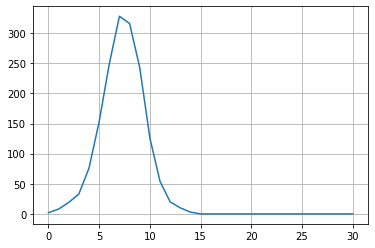

In [10]:
#complete model
def brokenNetworkModel():
    #paramaters
    s = 2000
    p = .90 #remove p percent of edges -------------------------------------------------------------
    numGen = 30
    q = .99
    i = 2

    #build network and infect first interval
    G = nx.complete_graph(s)   
    nx.set_node_attributes(G, "s", "val")
    removeRandom(G, p)
    print(f'Number of Edges: {G.number_of_edges()}')
    I = [i]
    start(G,i)
    # nx.draw(G)

    #infect numGen intervals of the network
    for i in range(numGen):
        output = infect(G,q)
        I.append(len(output[0]))

        for j in output[0]:
            G.nodes[j]['val'] = 'i'
        for r in output[1]:
            G.nodes[r]['val'] = 'r'

    #plot data and output data
    plt.plot(I)
    print(f'Total infected: {sum(I)}')
    print(f'Peak infected: {max(I)}')

#re-runs the model numRep number of times
numRep = 1
for i in range(numRep):
    print(f'\nRep: {i+1}')
    brokenNetworkModel()

plt.grid()
plt.show()

In [ ]:
#As p increases, the peak decreases and the length of time of the infection increases slightly
#As q decreases, the peak increases and the length of time of the infection decreases significantly

Number of Edges: 19


C:\Users\mburs\AppData\Local\Temp\ipykernel_20396\1908010638.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  G.remove_edges_from(random.sample(G.edges(), k=num))


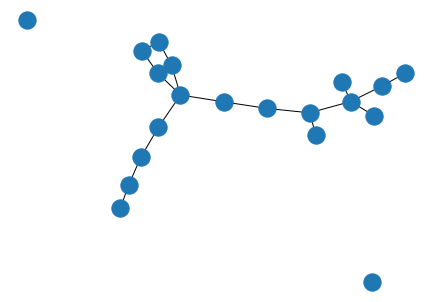

In [29]:
s = 20
p = 0 #change prob here -------------------------------------------------------------
numGen = 30
q = .55
i = 2
G = nx.complete_graph(s)   
nx.set_node_attributes(G, "s", "val")
removeRandom(G, p)
print(f'Number of Edges: {G.number_of_edges()}')
I = [i]
start(G,i)
nx.draw(G)